# Project: TMDB-Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, I will be analyzing data associated with the Movie Database (TMDb). I will be interested in looking at the most popular genres from year to year that are associated with high revenues. Also, I will be exploring the properties that are associated with movies that have high revenues, comparing the results with those in the time of inflation.

### Dataset Description 
The dataset consists of 10,866 entries or rows and 21 columns. The column names and their significance are listed below:

|Column name|Significance|
|:--|-----------------------:|
|id|Identifier of each movie|
|imdb_id|Internet movie database identifier of each movie|
|popularity|The users' rating of the movie|
|budget|The cost of production of the movie without inflation|
|revenue|Total money obtained from the movie without inflation|
|original_title|The original title of the movie|
|cast|Actors or actresses assined in the movie|
|homepage|The URL of the movie
|director|The director of the movie|
|tagline|Phrase associated with the movie|
|keywords|Word(s) connected to the title|
|overview|Brief note about the movie|
|runtime|The duration of the movie|
|genres|The categories of movie|
|production_companies|The companies that produce the movie|
|release_date|Date the movie was released|
|vote_count|Number of votes for the movie|
|vote_average|Weighted average vote for the movie|
|released_year|The year the movie was released|
|budget_adj|The cost of production of the movie during inflation|
|revenue_adj|Total money obtained from the movie with inflation|

The following are the research questions I will be exploring in this project:
- Which genres are most popular from year to year?
- Are the most popular genres associated with high revenues?
- What kinds of properties are associated with movies that have high revenues?

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
I will begin by loading the data and inspecting it for the need of cleaning

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
import pandas as pd
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# display a concise summary of the dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Some columns have missing values. Next I will be determining the number of missing values for those columns


In [4]:
# number of missing values 
movies_df.isna().sum()[movies_df.isna().sum() > 0]

imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64

Over 70% of the movies' URLs are missing. This column can be dropped. In this project I will be more concerned with the genres column. I will examine its unique values for cleaning and change its data type to category. The data type of columns budget and revenue will be change to float to ease comparison with the columns budget_adj and revenue_adj.

In [5]:
# unique values of the column genres
movies_df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [6]:
# number of unique values
movies_df.genres.nunique()

2039

In [7]:
# Checking for rows where the values of 'genres' does not contain pipe(|) 
movies_df.dropna(subset=['genres'], inplace=True)
hb_df = movies_df[~movies_df['genres'].str.contains('|')]
hb_df.shape

(0, 21)

It is observed that all the values of the genres column are consist of multiple combinations of movie categories separated by pipe(|) characters. Each of these category values have to be a movie entry or row.

Let me also check if there are duplicate rows in the dataset

In [8]:
# check for duplicated rows
np.sum(movies_df.duplicated())

1

There is one duplicated row which will be dropped in the section of data cleaning.

Finally, in this section, I will be looking at the summary statistics of the dataset.

In [9]:
# Summary statistics
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,91977.394803,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.500000,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20558.000000,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75182.000000,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# check the shape of the part of dataframe with revenue less or equal to the median value (0.0)
movies_df.query('revenue <= {}'.format(movies_df['revenue'].median())).shape

(5993, 21)

In [11]:
# proportion of no revenue generating movies
5993/movies_df.shape[0]

0.5527068154569769

From the summary statistics above, it is seen that movies have about `65%` popularity among the users. It takes about `$14,656,720` to produce a classic movie, and there is a likelihood to make a revenue of about `$39,907,790`. That is over `170%` profit when there is no inflation. During inflation, the average budget for a classic movie is about `$17,588,270`, and the potential revenue to obtain is about `$51,473,320`. Meaning there will be a profit of over `190%`. The limitation with this statistics is that over `55%` of the movies does not generate revenue.


### Data Cleaning
Here, I will be converting the datatypes of relevant columns to the appropriate datatype and splitting the values in the 'genres' and column and making each value in the list a row in the dataset or unpivot the dataset. The duplicate rows will also be dropped in this section. Finally, the data will be trimmed from unnecessary columns.
 

In [12]:
# convert budget and revenue columns to float
movies_df['budget'] = movies_df['budget'].astype('float')
movies_df['revenue'] = movies_df['revenue'].astype('float')

In [13]:
# split the list of values in the genres column into rows and convert the datatype to category
movies_df['genres'] = movies_df['genres'].str.split('|')
movies_df = movies_df.explode('genres').reset_index(drop=True)
movies_df['genres'] = movies_df['genres'].astype('category')
movies_df.genres.dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [14]:
# drop the duplicate rows
movies_df.drop_duplicates(inplace=True)

In [15]:
movies_df.shape

(26955, 21)

Unpivoting the dataset increases the number of rows by more than twice the original value.

In [16]:
# columns to trim off
trim_columns = ['imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','production_companies',
               'release_date','vote_count','vote_average']
movies_df.drop(columns=trim_columns, axis=1, inplace=True)
movies_df.shape

(26955, 9)

<a id='eda'></a>
## Exploratory Data Analysis
Here, I will be finding patterns in the data and visualizing the relationships based on my research questions.
### Research Question 1: Which genres are most popular from year to year?
In this task, I assume the most popular genres are the ones which appear in the dataset more than 1000 times.

In [17]:
# number of unique genres
movies_df.genres.nunique()

20

In [18]:
# Most popular genres
popular_genres = movies_df.genres.value_counts()[movies_df.genres.value_counts() > 1000]
popular_genres

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Name: genres, dtype: int64

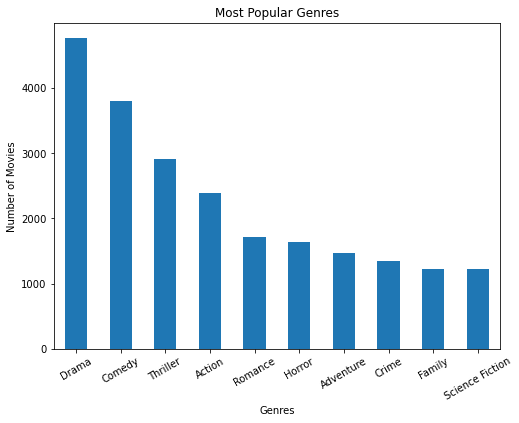

In [19]:
popular_genres.plot(kind='bar', figsize=(8,6))
plt.title('Most Popular Genres')
plt.ylabel('Number of Movies')
plt.xlabel('Genres')
plt.xticks(rotation=30)
plt.show()

From the graph, it is clearly seen that Drama, Comedy and Thriller are the 3 most popular genres of movies.

Next, I will be examining the popularity of genres from year to year

In [20]:
# filter the datframe each of the popular genre
drama = movies_df.query('genres == "Drama"')
comedy = movies_df.query('genres == "Comedy"')
thriller = movies_df.query('genres == "Thriller"')
action = movies_df.query('genres == "Action"')
romance = movies_df.query('genres == "Romance"')
horror = movies_df.query('genres == "Horror"')
adventure = movies_df.query('genres == "Adventure"')
crime = movies_df.query('genres == "Crime"')
family = movies_df.query('genres == "Family"')
science_fiction = movies_df.query('genres == "Science Fiction"')

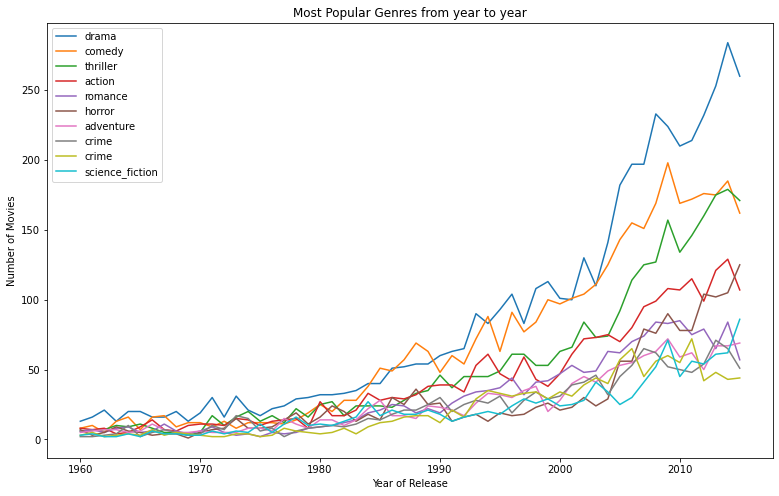

In [21]:
# line plots for the most popular genres from year to year
drama.groupby('release_year')['genres'].count().plot(kind='line', label='drama', figsize=(13,8))
comedy.groupby('release_year')['genres'].count().plot(kind='line', label='comedy')
thriller.groupby('release_year')['genres'].count().plot(kind='line', label='thriller')
action.groupby('release_year')['genres'].count().plot(kind='line', label='action')
romance.groupby('release_year')['genres'].count().plot(kind='line', label='romance')
horror.groupby('release_year')['genres'].count().plot(kind='line', label='horror')
adventure.groupby('release_year')['genres'].count().plot(kind='line', label='adventure')
crime.groupby('release_year')['genres'].count().plot(kind='line', label='crime')
family.groupby('release_year')['genres'].count().plot(kind='line', label='crime')
science_fiction.groupby('release_year')['genres'].count().plot(kind='line', label='science_fiction')
plt.title('Most Popular Genres from year to year')
plt.ylabel('Number of Movies')
plt.xlabel('Year of Release')
plt.legend()
plt.show()

Overall, Drama is the most popular genres of movies. Before 1990, there was a strong competition for the most popular genres. After 1990, Drama, Comedy and thriller remained the 3 most popular genres of movies.

### Research Question 2: Are the most popular genres associated with high revenues?
I will begin this task by filtering only the rows with non-zero revenues, and then compute their mean revenue. Revenues that are greater or equal to this mean will be considered as high revenues whereas those that are lesser than the mean are low revenues. With this, I will filter a dataframe of high revenues from which I will deduce whether or not the most popular genres are associated with it. This will be done for revenues without inflation and during inflation.

In [22]:
# filter movies with non-zero revenues without inflation
non_zero_rev_df = movies_df.query('revenue > 0')

In [23]:
# Overall mean of revenue without inflation
mean_rev = non_zero_rev_df['revenue'].mean()
mean_rev

100982586.20167403

In [24]:
# filter movies with non-zero revenues with inflation
non_zero_rev_inf_df = movies_df.query('revenue_adj > 0')

In [25]:
# Overall mean of revenue with inflation
mean_rev_inf = non_zero_rev_inf_df['revenue_adj'].mean()
mean_rev_inf

129602508.3046063

In [26]:
# filter dataframes with high revenues
high_rev = movies_df.query('revenue >= {}'.format(mean_rev))
high_rev_inf = movies_df.query('revenue_adj >= {}'.format(mean_rev_inf))

In [27]:
# Check the association of most popular genres with high revenues without inflation - number of movies
high_rev.genres.value_counts()

Action             449
Comedy             441
Drama              411
Adventure          386
Thriller           347
Family             229
Science Fiction    210
Fantasy            204
Romance            187
Crime              175
Animation          127
Mystery            100
Horror              85
War                 42
Music               40
History             34
Western             18
Documentary          2
TV Movie             0
Foreign              0
Name: genres, dtype: int64

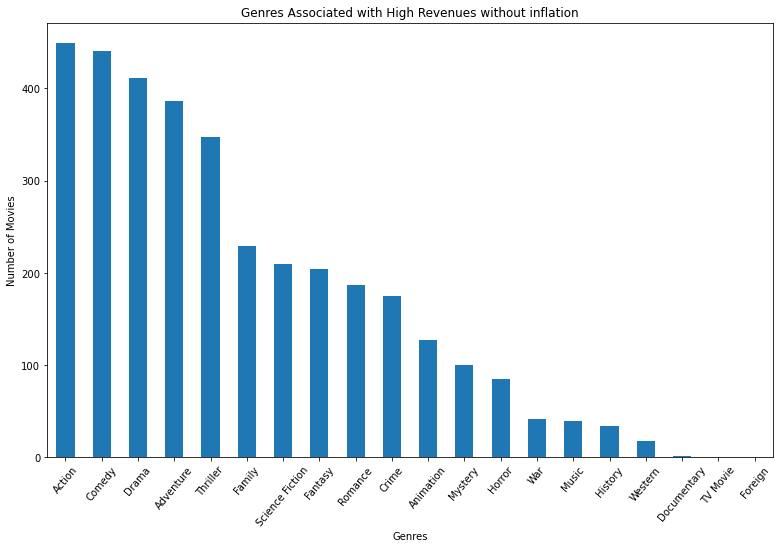

In [28]:
# bar chart for showing the association above
high_rev.genres.value_counts().plot(kind='bar', figsize=(13,8))
plt.title('Genres Associated with High Revenues without inflation')
plt.ylabel('Number of Movies')
plt.xlabel('Genres')
plt.xticks(rotation=50)
plt.show()

Based on the number of movies produced, the most popular genres associated with high revenues is Action.

In [29]:
# Check the association of most popular genres with high revenues without inflation - average revenue generated
mean_rev_genres = high_rev.groupby('genres')['revenue'].mean().sort_values(ascending=False)
mean_rev_genres

genres
Fantasy            3.930658e+08
Adventure          3.907375e+08
Animation          3.883545e+08
Science Fiction    3.611609e+08
Family             3.456364e+08
Action             3.297169e+08
Thriller           2.612377e+08
Mystery            2.418044e+08
War                2.388649e+08
Comedy             2.375142e+08
Romance            2.338008e+08
Crime              2.304419e+08
Drama              2.287332e+08
Western            2.078801e+08
Music              2.072627e+08
History            2.030528e+08
Horror             1.852981e+08
Documentary        1.140573e+08
Foreign                     NaN
TV Movie                    NaN
Name: revenue, dtype: float64

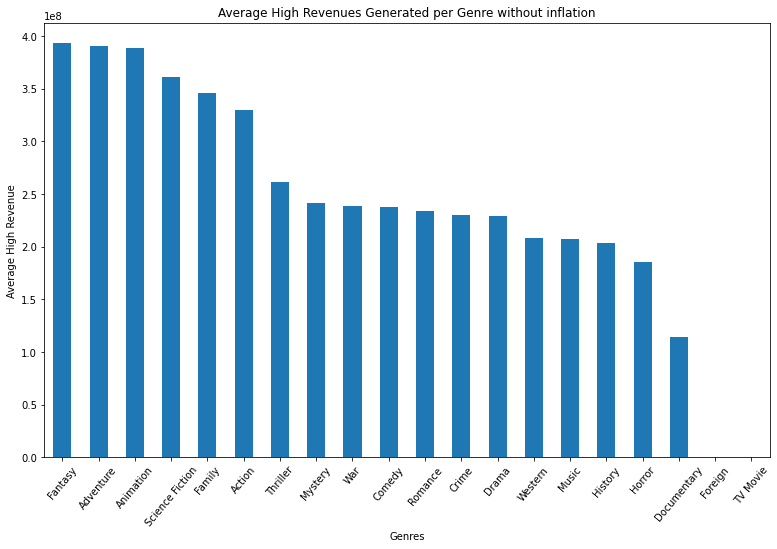

In [30]:
# bar chart for showing the association above
mean_rev_genres.plot(kind='bar', figsize=(13,8))
plt.title('Average High Revenues Generated per Genre without inflation')
plt.ylabel('Average High Revenue')
plt.xlabel('Genres')
plt.xticks(rotation=50)
plt.show()

Based on the average high revenue generated, an unpopular genre (Fantasy) generated the highest average high revenue.

Now, let me see what the case will be during inflation.

In [32]:
# Check the association of most popular genres with high revenues without inflation - number of movies
high_rev_inf.genres.value_counts()

Action             470
Drama              442
Comedy             437
Adventure          404
Thriller           360
Family             224
Science Fiction    213
Fantasy            197
Romance            197
Crime              185
Animation          127
Mystery             99
Horror              79
War                 54
Music               44
History             40
Western             19
Documentary          1
TV Movie             0
Foreign              0
Name: genres, dtype: int64

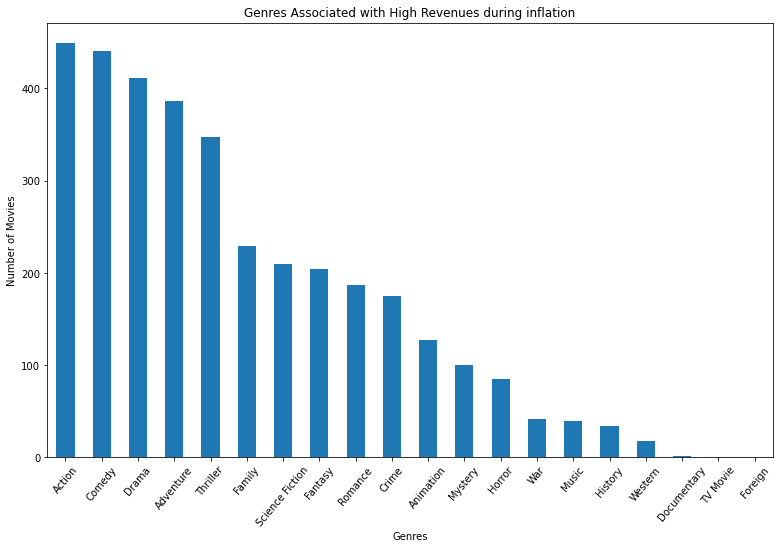

In [33]:
# bar chart for showing the association above
high_rev.genres.value_counts().plot(kind='bar', figsize=(13,8))
plt.title('Genres Associated with High Revenues during inflation')
plt.ylabel('Number of Movies')
plt.xlabel('Genres')
plt.xticks(rotation=50)
plt.show()

Like in the case without inflation above, based on the number of movies, the most genres associated high revenues is Action.

In [34]:
# Check the association of most popular genres with high revenues during inflation - average revenue generated
mean_rev_inf_genres = high_rev_inf.groupby('genres')['revenue'].mean().sort_values(ascending=False)
mean_rev_inf_genres

genres
Fantasy            4.009889e+08
Animation          3.860492e+08
Adventure          3.736953e+08
Science Fiction    3.550000e+08
Family             3.482034e+08
Action             3.146209e+08
Thriller           2.496916e+08
Mystery            2.374973e+08
Comedy             2.332107e+08
Romance            2.205149e+08
Crime              2.156477e+08
Drama              2.110595e+08
War                1.979020e+08
Western            1.933236e+08
Music              1.887938e+08
Horror             1.827378e+08
History            1.716556e+08
Documentary        1.191145e+08
Foreign                     NaN
TV Movie                    NaN
Name: revenue, dtype: float64

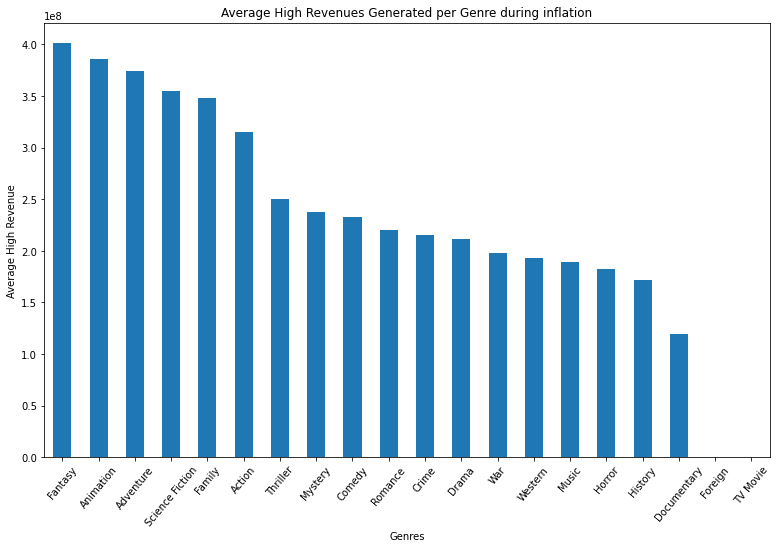

In [35]:
# bar chart for showing the association above
mean_rev_inf_genres.plot(kind='bar', figsize=(13,8))
plt.title('Average High Revenues Generated per Genre during inflation')
plt.ylabel('Average High Revenue')
plt.xlabel('Genres')
plt.xticks(rotation=50)
plt.show()

As with the case without inflation, based on average high revenue generated, unpopular genres (Fantasy and Animation) are the top 2 revenue generating genres.

### Research Question 3: What kinds of properties are associated with movies that have high revenues?
In this last task, I will be examining the relationship between high revenues with the popularity of a movie, budget, and runtime during and without inflation.

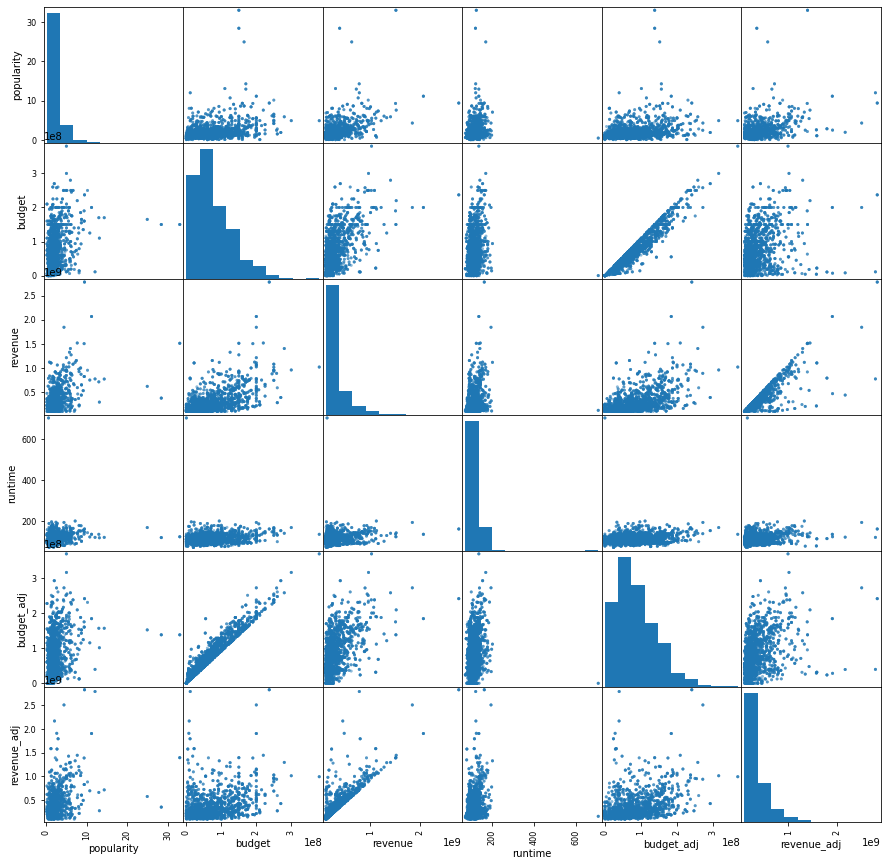

In [36]:
# matrix of scatter plots and distribution of each feature
pd.plotting.scatter_matrix(high_rev[['popularity','budget','revenue','runtime','budget_adj','revenue_adj']], figsize=(15,15));

From the matrix of scatter plots above, it can be seen that:
- There is a moderate correlation between budget and high revenue.
- There is a strong correlation between popularity and high revenue.
- There is a strong correlation between runtime and high revenue.
- Inflation also appears to be favourable factor towards high revenues.


<a id='conclusions'></a>
## Conclusions

From my exploratory data analysis, the following findings and results were observed:
1. Of the 20 unique genres, the 10 most popular genres in descending order are:
   * Drama
   * Comedy
   * Thriller
   * Action
   * Romance
   * Horror
   * Adventure
   * Crime
   * Family
   * Science Fiction
2. Except between 1985 and 1990, Drama had been the most popular genres from year to year.
   Before 1990, there was a big scramble for the most popular genres among the other popular genres. But after 1990; Drama, Comedy and Thriller stood out as the 3 most popular genres.
3. Though average they are not the most revenue generating genres, since all the 10 most popular genres appear in the chart of average high revenues generated, it can be said that the most popular genres are associated with high revenues.
4. The features associated with movies that have high revenues are:
   * Genres
   * Budget
   * Popularity
   * Runtime
   
## Limitations
- Over 55% of movies in the dataset are not commercial movies. The high frequency of these movies in the dataset definitely has an impact on the most popular genres. For example, Drama as the most popular genres had a frequency of 4760 in the overall dataset, but only a frequency of 411 as high revenue movies. That's only about 9% of the Drama movies are generating high revenues but they stand as the most popular.
- The number of movies per genres are not uniform. This makes the dataset to be bias.

### Resource Used

https://stackoverflow.com